In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
inputData, y=mnist['data'], mnist['target']
inputData = inputData / 255.

In [3]:
nDigits=10

In [4]:
y_OneHot=np.zeros([y.shape[0], nDigits])
y_OneHot.shape

(70000, 10)

In [5]:
for i in range(y.shape[0]):
    y_OneHot[i, int(y[i])]=1
y_OneHot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
m=65000
m_test=inputData.shape[0] - m

y_train=y_OneHot[:m, :]
y_test=y_OneHot[m:, :]

In [7]:
inputData_train, inputData_test=inputData[:m, :], inputData[m:, :]

In [8]:
y_OneHot[7, :]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

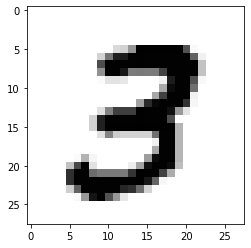

In [9]:
### Show a  random Input

i=7
plt.imshow(inputData_train[i, :].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [10]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [11]:
inputDim = inputData_train.shape[1]
nHidden = 128
learning_rate = 0.3
weight_decay = 0.0001

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = inputData_train
y = y_train

Epoch 0 cost:  2.303097988536237
Epoch 10 cost:  2.2407575003159557
Epoch 20 cost:  1.8319724623358309
Epoch 30 cost:  1.140728288496334
Epoch 40 cost:  0.8043761179406158
Epoch 50 cost:  0.6464094261869331
Epoch 60 cost:  0.5587466730965986
Epoch 70 cost:  0.5036438971916178
Epoch 80 cost:  0.4657830268556765
Epoch 90 cost:  0.4381482463791415
Epoch 100 cost:  0.4170866967102508
Epoch 110 cost:  0.40046334420331753
Epoch 120 cost:  0.3869250987575558
Epoch 130 cost:  0.37561469062648045
Epoch 140 cost:  0.365960907182424
Epoch 150 cost:  0.3575643134753434
Epoch 160 cost:  0.35014177141323166
Epoch 170 cost:  0.3434978674962859
Epoch 180 cost:  0.3374864605074586
Epoch 190 cost:  0.3319862082124377


<function matplotlib.pyplot.show(*args, **kw)>

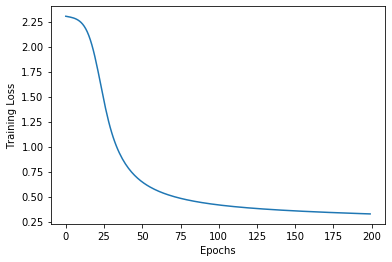

In [12]:
nEpochs = 200
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [13]:
Z1 = np.matmul(W1, inputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

In [14]:
for i in range(20):
    print("Actual Value= {} and Predicted Value= {}".format(labels[i], predictions[i]))

Actual Value= 3 and Predicted Value= 3
Actual Value= 9 and Predicted Value= 4
Actual Value= 9 and Predicted Value= 9
Actual Value= 8 and Predicted Value= 8
Actual Value= 4 and Predicted Value= 4
Actual Value= 1 and Predicted Value= 1
Actual Value= 0 and Predicted Value= 0
Actual Value= 6 and Predicted Value= 6
Actual Value= 0 and Predicted Value= 0
Actual Value= 9 and Predicted Value= 4
Actual Value= 6 and Predicted Value= 6
Actual Value= 8 and Predicted Value= 8
Actual Value= 6 and Predicted Value= 6
Actual Value= 1 and Predicted Value= 1
Actual Value= 1 and Predicted Value= 1
Actual Value= 9 and Predicted Value= 4
Actual Value= 8 and Predicted Value= 8
Actual Value= 9 and Predicted Value= 9
Actual Value= 2 and Predicted Value= 2
Actual Value= 3 and Predicted Value= 3


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))
print("Accuracy Score: ", accuracy_score(predictions, labels))

[[511   0   7   2   1   4   5   1   3   5]
 [  0 546   2   0   1   1   0   0   4   0]
 [  1   0 453  13   1   4   1  10   2   0]
 [  1   0   2 463   0  18   0   1   4   1]
 [  0   0   8   0 462   6   6   1   3  17]
 [  2   1   0  13   0 383   1   0  10  10]
 [  3   1   6   1   3  10 481   0  11   0]
 [  1   1   4   3   1   1   0 496   1  11]
 [  1  15  16  10   4   9   2   0 442   1]
 [  0   0   4   5   9   0   0   7   5 444]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       539
           1       0.97      0.99      0.98       554
           2       0.90      0.93      0.92       485
           3       0.91      0.94      0.93       490
           4       0.96      0.92      0.94       503
           5       0.88      0.91      0.89       420
           6       0.97      0.93      0.95       516
           7       0.96      0.96      0.96       519
           8       0.91      0.88      0.90       500
           9       0.91     

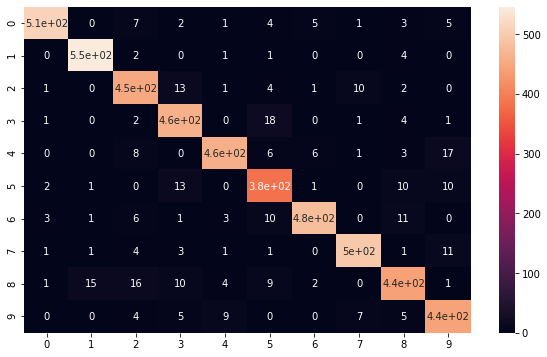

In [16]:
cm=confusion_matrix(predictions, labels)
plt.figure(figsize=(10, 6))
fig=sns.heatmap(cm, annot=True)